In [1]:

import matplotlib.pyplot as plt
import numpy as np
from math import pi
     

from qutip import *
from scipy import *

In [2]:
toy_models = {
            "1":
               {
                   "j_map" : [[0,1,1,-1,0],[1,0,1,0,-1],[1,1,0,1,1],[-1,0,1,0,1],[0,-1,1,1,0]],
                   "gs_indeces": [  {"i":0, "suppressed": True},
                                    {"i":3, "suppressed": False},
                                    {"i":7, "suppressed": False}]
                   },
            "2": {
                    "j_map" : [[0,2,1,2,1],[2,0,-2,-1,1],[1,-2,0,1,2],[2,-1,1,0,-2],[1,1,2,-2,0]],
                    "gs_indeces": [{"i":0, "suppressed": False},
                                    {"i":2, "suppressed": False},
                                    {"i":5, "suppressed": True},
                                    {"i":6, "suppressed": False},
                                    {"i":8, "suppressed": False},
                                    {"i":9, "suppressed": False}]
                },
            "3": {
                    "j_map" : [[0,0,1,0,0,0],[0,0,0,1,0,0],[1,0,0,-1,1,-1],[0,1,-1,0,1,-1],[0,0,1,1,0,1], [0,0,-1,-1,1,0]],
                    "gs_indeces": [{"i":1, "suppressed": True},
                                    {"i":20, "suppressed": False},
                                    {"i":23, "suppressed": False}]
                },

            "4": {
                    "j_map" : [[0,1,0,0],[0,0,-1,-1],[0,-1,0,-1],[0,-1,-1,0]],
                    "gs_indeces": [{"i":1, "suppressed": True},
                                    {"i":2, "suppressed": True},
                                    {"i":3, "suppressed": False}]
                },

            
            
            }

model = toy_models["4"]
j_map = model["j_map"]
gs_indeces = model["gs_indeces"]
N = len(j_map[0])

In [3]:


si = qeye(2)
sz = sigmaz()


# Problem Hamiltonian
# Hp = -sum(Jij sigma_i_z sigma_j_z)


Hp = 0
for i in range(len(j_map)):
    for j in range(i,len(j_map[i])):

        sigma_i = [si if k != i else sz for k in range(N) ]
        sigma_j = [si if l != j else sz for l in range(N) ]

        Hp += j_map[i][j] * tensor(sigma_i) * tensor(sigma_j)   


print(Hp)
print(Hp.diag())

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  

In [4]:
# transverse field hamiltonian

si = qeye(2)
sx = sigmax()

Ht = 0
for i in range(N):
    sigma_x = [si if k != i else sx for k in range(N)]
    Ht += tensor(sigma_x)

Ht

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]]

In [5]:
# Iterate through annealing times

gs_probs = [[] for i in range(len(gs_indeces))]
total_prob = []

for log_T in np.arange(-1,4,0.1):

    taulist = np.linspace(0, (10**log_T), 1000)

    # Initialize in equal superposition
    psi_list = [(1/np.sqrt(2))*(basis(2,0) + basis(2,1)) for n in range(N)]
    psi0 = tensor(psi_list)


    # the time-dependent hamiltonian in list-function format
    args = {"t_max": max(taulist)}
    h_t = [
        [-Ht, lambda t, args: (args["t_max"] - t) / args["t_max"]],
        [-Hp, lambda t, args: t / args["t_max"]],
    ]

    # transform Hamiltonian to QobjEvo
    h_t = QobjEvo(h_t, args=args)

    res = sesolve(h_t, psi0, taulist, [], args)
    final_state = [(x.real**2 + x.imag**2)[0] for x in  res.states[-1].full()]
    t_p = 0
    for i, gs_info in enumerate(gs_indeces):
        gs_probs[i].append(2*final_state[gs_info["i"]])
        t_p += 2*final_state[gs_info["i"]]
    total_prob.append(t_p)


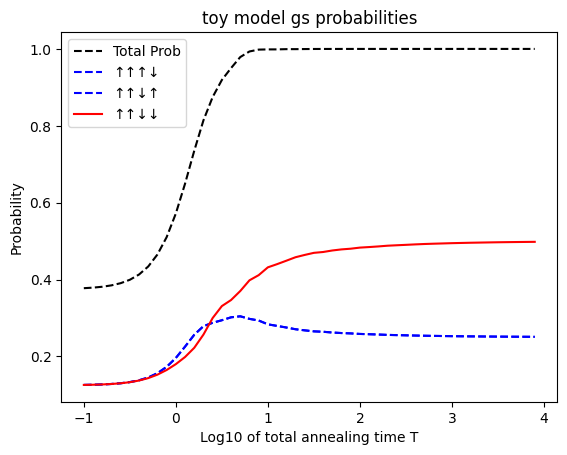

In [6]:
unicode_map = {"0": "\u2191", "1": "\u2193"}

plt.plot([i for i in np.arange(-1,4,0.1)], total_prob, color= "black", linestyle='--', label = "Total Prob")

for i,gs in enumerate(gs_indeces):
    plt.plot([i for i in np.arange(-1,4,0.1)], gs_probs[i], color = "blue" if gs["suppressed"] else "red", linestyle='--' if gs["suppressed"] else '-', label = "".join([unicode_map[c] for c in bin(gs["i"])[2:].zfill(N)]))


plt.title("toy model gs probabilities")
plt.xlabel("Log10 of total annealing time T")
plt.ylabel("Probability")
plt.legend()
plt.show()